Se han importado los paquetes necesarios

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from matplotlib.dates import DateFormatter

Carga de los conjuntos de datos

In [92]:
begin_inventory=pd.read_csv('BegInvFINAL12312016.csv')
end_inventory=pd.read_csv('EndInvFINAL12312016.csv')
purchases=pd.read_csv('PurchasesFINAL12312016.csv')
purchase_prices=pd.read_csv('2017PurchasePricesDec.csv')
purchase_invoices=pd.read_csv('InvoicePurchases12312016.csv')
sales=pd.read_csv('SalesFINAL12312016.csv')

In [93]:
begin_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [94]:
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [95]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [96]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [97]:
purchase_invoices.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [98]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


1.3 Análisis exploratorio de datos

Aquí realizamos el Análisis Exploratorio de Datos para todos nuestros conjuntos de datos. Desarrollamos una visión general que incluye detalles clave sobre los conjuntos de datos, como tipos de datos, estructura y estadísticas de resumen. Esta visión global ayudará a identificar errores, incoherencias o patrones, lo que contribuirá a la posterior limpieza y preprocesamiento de los datos.

In [57]:
# Se ha creado una función donde devuelve una tabla con la info necesaria para hacerse una idea de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Rows', 'Missing Values', 'Missing Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        rows = df[column].shape[0]  # Solo obtenemos el número de filas
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, unique_count, rows, missing_values, missing_percentage.round(4)]
    return report

In [99]:
dataframe_info(begin_inventory)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,InventoryId,object,206529,206529,0,0.0
1,Store,int64,79,206529,0,0.0
2,City,object,67,206529,0,0.0
3,Brand,int64,8094,206529,0,0.0
4,Description,object,7291,206529,0,0.0
5,Size,object,41,206529,0,0.0
6,onHand,int64,474,206529,0,0.0
7,Price,float64,329,206529,0,0.0
8,startDate,object,1,206529,0,0.0


In [101]:
dataframe_info(end_inventory)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,InventoryId,object,224489,224489,0,0.000
1,Store,int64,80,224489,0,0.000
2,City,object,67,224489,1284,0.572
3,Brand,int64,9653,224489,0,0.000
4,Description,object,8732,224489,0,0.000
5,Size,object,47,224489,0,0.000
6,onHand,int64,548,224489,0,0.000
7,Price,float64,354,224489,0,0.000
8,endDate,object,1,224489,0,0.000


In [103]:
dataframe_info(purchases)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,InventoryId,object,245907,2372474,0,0.0000
1,Store,int64,80,2372474,0,0.0000
2,Brand,int64,10664,2372474,0,0.0000
3,Description,object,9652,2372474,0,0.0000
4,Size,object,51,2372474,3,0.0001
5,VendorNumber,int64,126,2372474,0,0.0000
6,VendorName,object,129,2372474,0,0.0000
7,PONumber,int64,5543,2372474,0,0.0000
8,PODate,object,319,2372474,0,0.0000
9,ReceivingDate,object,364,2372474,0,0.0000


In [104]:
dataframe_info(purchase_prices)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,Brand,int64,12261,12261,0,0.0000
1,Description,object,11114,12261,1,0.0082
2,Price,float64,380,12261,0,0.0000
3,Size,object,56,12261,1,0.0082
4,Volume,object,33,12261,1,0.0082
5,Classification,int64,2,12261,0,0.0000
6,PurchasePrice,float64,2314,12261,0,0.0000
7,VendorNumber,int64,131,12261,0,0.0000
8,VendorName,object,136,12261,0,0.0000


In [105]:
dataframe_info(purchase_invoices)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,VendorNumber,int64,126,5543,0,0.0000
1,VendorName,object,129,5543,0,0.0000
2,InvoiceDate,object,373,5543,0,0.0000
3,PONumber,int64,5543,5543,0,0.0000
4,PODate,object,319,5543,0,0.0000
5,PayDate,object,382,5543,0,0.0000
6,Quantity,int64,2895,5543,0,0.0000
7,Dollars,float64,5226,5543,0,0.0000
8,Freight,float64,4052,5543,0,0.0000
9,Approval,object,1,5543,5169,93.2528


In [106]:
dataframe_info(sales)

,Column,Data Type,Unique Count,Rows,Missing Values,Missing Percentage
0,InventoryId,object,170131,1048575,0,0.0
1,Store,int64,79,1048575,0,0.0
2,Brand,int64,7658,1048575,0,0.0
3,Description,object,6890,1048575,0,0.0
4,Size,object,40,1048575,0,0.0
5,SalesQuantity,int64,141,1048575,0,0.0
6,SalesDollars,float64,3426,1048575,0,0.0
7,SalesPrice,float64,273,1048575,0,0.0
8,SalesDate,object,60,1048575,0,0.0
9,Volume,int64,22,1048575,0,0.0


La exploración de datos ayuda a identificar irregularidades que necesitan limpieza y preprocesamiento:

- Los InventoryId tanto en beginning_inventory como en ending_inventory tienen recuentos únicos iguales a los recuentos totales. Esto sugiere que podrían servir como claves primaria y foránea para unir las dos tablas. A pesar de tener atributos idénticos (excepto las columnas de inventario), es posible que los ID no coincidan. Otros conjuntos de datos carecen de una clave primaria específica, ya que el recuento total difiere de los recuentos únicos. Por lo tanto, hay que tener cuidado al unir tablas.
- Algunas tablas contienen valores omitidos que es necesario identificar y tratar adecuadamente.
Las columnas de tamaño en todas las tablas muestran incoherencias debido a la variación de las unidades de medida. Algunos ejemplos son 750mL, Litro, 750mL + 2/,2 Pk, 50mL 4 Pk, 750mL 3 Pk. Es necesario convertirlas a una unidad de medida única y coherente.
Las columnas Tamaño y Volumen llevan datos duplicados y una de ellas puede eliminarse.
- El formato de fecha difiere entre tablas. Por ejemplo, la tabla de ventas utiliza d/m/aaaa, mientras que otras utilizan aaaa/mm/dd.
- Algunas columnas contienen espacios finales y finales entre las entradas, como se ve en la columna VendorName de la tabla de compras (por ejemplo, ALTAMAR BRANDS LLC ,).

### 1.4 Limpieza y preprocesamiento de datos
 

A. Manejo de Missings

- Las tablas "begin_inventory" y "sales" no tienen valores faltantes, por lo que nos concentraremos en las otras cuatro tablas.

- Missings en la tabla "end_inventory" en la columna "city":De un total de 224.489 entradas, faltan 1.284 valores en la columna "Ciudad". Al examinar los otros 66 nombres únicos de ciudades y sus correspondientes ubicaciones de tienda, todas las ciudades tienen nombre excepto la ciudad vinculada a la ubicación de tienda 46. Por lo tanto, es razonable asignarle el nombre TYWARDREATH, que corresponde a su número de tienda.

- Missings en la tabla "purchases" en la columna "size": Sólo faltan 3 valores de un total de 2.372.474 entradas, por lo que se ha decidiso eliminar esas filas. 

- Missings en la tabla "Sales" en la columna "Approval": En 5.169 registros de un total de 5.543 faltan valores, lo que supone el 93% del total. Esto podría indicar que no están aprobados o pendientes de aprobación. Dado el alto porcentaje de valores faltantes, se ha decidido eliminar la columna.

- Missings en la tabla "purchase_prices": Faltan valores individuales en las columnas "Description", "Size" y "Volume". En estos casos como estamos hablando de un solo registro en cada caso, se ha decidido elimar dichas filas.

In [118]:
#Handling Missing Values in Ending Inventory of Column "City"
end_inventory["City"] = end_inventory["City"].fillna("TYWARDREATH")

#Handling Missing Values in Purchase table of Column "Size"
purchases = purchases[purchases['Size'].notna()]

#Handling Missing Values in the "Approval" Column of the Purchase Invoice Table
purchase_invoices = purchase_invoices.drop(['Approval'], axis=1)

#Handling Missing  Values in the Purchase Price Table
purchase_prices.dropna(subset=["Description"], inplace=True)
purchase_prices.dropna(subset=["Size"], inplace=True)
purchase_prices.dropna(subset=["Volume"], inplace=True)

# Funcion para confirmar que se han eliminado los missings
def check_missing_values(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = {}
        for idx, column_name in enumerate(dataset.columns):
            missing_count =dataset[column_name].isnull().sum()
            if missing_count > 0:
                missing_values_count[column_name] = missing_count
        
        if len(missing_values_count) == 0:
            print(f"Missing values count in {dataset_name} = {len(missing_values_count)}")
        else:
            for column_name, count in missing_values_count.items():
                print(f"Column: {column_name}, Missing Values Count: {count}")
       
check_missing_values(("Beginning Inventory", begin_inventory),
                     ("Ending Inventory", end_inventory),
                     ("Purchases Table", purchases),
                     ("Purchase Invoices Table", purchase_invoices),
                     ("Purchase Prices Table", purchase_prices),
                     ("Sales Table", sales))

Missing values count in Beginning Inventory = 0
Missing values count in Ending Inventory = 0
Missing values count in Purchases Table = 0
Missing values count in Purchase Invoices Table = 0
Missing values count in Purchase Prices Table = 0
Missing values count in Sales Table = 0


c. Tratamiento de duplicados

No tenemos ninguna fila duplicada en ninguno de los conjuntos de datos según el resumen anterior.

In [120]:
# Comprobacion de duplicados
datasets = [begin_inventory, end_inventory, purchases, purchase_invoices, purchase_prices, sales]

for i, df in enumerate(datasets, start=1):
    print(f"Verificación de duplicados en el dataset {i}:")
    duplicados = df.duplicated().any()
    if duplicados:
        print("El dataset tiene duplicados.")
    else:
        print("El dataset no tiene duplicados.")
    print("-" * 50)  # Separador entre datasets

Verificación de duplicados en el dataset 1:
El dataset no tiene duplicados.
--------------------------------------------------
Verificación de duplicados en el dataset 2:
El dataset no tiene duplicados.
--------------------------------------------------
Verificación de duplicados en el dataset 3:
El dataset no tiene duplicados.
--------------------------------------------------
Verificación de duplicados en el dataset 4:
El dataset no tiene duplicados.
--------------------------------------------------
Verificación de duplicados en el dataset 5:
El dataset no tiene duplicados.
--------------------------------------------------
Verificación de duplicados en el dataset 6:
El dataset no tiene duplicados.
--------------------------------------------------


d. Irregularidades en las entradas de datos.

La unidad de medida para la columna de Size en todos los conjuntos de datos (cinco en total) varía, excepto en el conjunto de datos purchase_price. La información sobre el tamaño, que representa el volumen, se introduce en varios formatos, como litro, mililitro, onza, paquete (pk) y combinaciones de los mismos. Por lo tanto, tenemos que convertir estas medidas en un litro estándar unificado. Comprobaremos los recuentos únicos. A los que tengan un solo recuento y no presenten un patrón, les asignaremos una tasa equivalente. A los que tengan varios recuentos y un patrón, los convertiremos según los patrones.

In [121]:
# Get a unique count of each size entry in all datasets and observe the pattern.
data_frames = [begin_inventory, end_inventory, purchases, purchases, sales]
all_sizes = pd.concat([df["Size"] for df in data_frames])
unique_sizes = all_sizes.unique()
size_counts = {}
for size in unique_sizes:
    size_counts[size] = all_sizes[all_sizes == size].count()
unique_sizes_with_counts = pd.DataFrame({
    'Size': unique_sizes,
    'Total Count': [size_counts[size] for size in unique_sizes]})
print(unique_sizes_with_counts)

          Size  Total Count
0        750mL      3311239
1        Liter       121440
2        1.75L      1403019
3         50mL       268606
4        375mL       209161
5    50mL 4 Pk         2893
6   375mL 2 Pk          757
7   750mL 3 Pk          196
8   375mL 3 Pk          121
9   750mL + 3/          425
10  200mL 3 Pk          724
11   50mL 3 Pk         1083
12  100mL 4 Pk         3257
13       100mL         5052
14   50mL 5 Pk         2774
15  200mL 4 Pk         3297
16  250mL 4 Pk         3675
17  750mL 2 Pk          681
18       200mL         4159
19     3/100mL          593
20        1.5L       551970
21          5L       122549
22          4L        14426
23  187mL 4 Pk        29249
24          3L       127860
25      5.0 Oz          901
26       187mL         8057
27       500mL        15067
28  187mL 3 Pk         2849
29       300mL         2594
30  50mL 12 Pk           32
31       330mL          569
32       250mL         1539
33         18L          493
34  750mL + 2/      

A partir de la salida de recuentos únicos, podemos observar que hay 75 formas diferentes de expresar medidas de tamaño (volumen)..
Hay tres recuentos únicos con un solo recuento cada uno: 3/100ml, 5/2 y galones. Los sustituiremos por tipos de conversión equivalentes.
Otros recuentos únicos presentan patrones. Podemos utilizar expresiones regulares para recorrerlos y aplicar tipos de conversión. Se pueden agrupar en tres patrones:
Ejemplos: 750ml, 750mL, 750ml + 3/, 750 4p, 750 4pk, etc.
Patrones como Litro, L o l
Tamaños expresados en Oz.
Crearemos una función para aplicar estas conversiones a todos los conjuntos de datos.

In [122]:
# Hand the irregulatities of size in all datasets(datasets) 
def convert_to_liters(size):
    size = str(size).lower()
    # Convert 3/100ml and 5/2 -->  
    if "3/100ml" in size: return round(3 * 0.01, 2)  #3/100ml--> 3 packs of 100ml 
    elif '5/2 oz' in size: return round(10 * 0.0295735, 2)  #5/2 oz --> 5 packs of 1/2
    
    #covert Gallon to liter
    elif 'gal' in size:
        gal_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(gal_value * 3.786, 2)   
    
    #handle pattern such as 750ml, 750mL, 750ml + 3/, 750 4p, 750  4pk, etc
    elif 'ml' in size:
        if 'p' in size:
            ml_value, pack_value = re.search(r'(\d+\.*\d*)\s*m*l*\s*(\d*)\s*p*/*P*k*/*', size).groups()
            ml_value = float(ml_value)
            pack_value = float(pack_value) if pack_value else 1
            return round(ml_value * pack_value / 1000, 2)  # p or pk means pack--> multiply
        elif '+' in size:
            ml_value, pack_value = map(float, re.findall(r'\d+\.*\d*', size))
            return round((ml_value + (pack_value * 50)) / 1000, 2)  
        else:
            ml_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(ml_value / 1000, 2)  
    
    # convert Liter or L or l
    elif 'liter' in size or 'l' in size:
        if size == 'liter' or size == 'l': return 1.00
        else:
            liter_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(liter_value, 2)  
    
    #ounces to liters    
    elif 'oz' in size:
        oz_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(oz_value * 0.0295735, 2) 
    else:
        return None

datasets = [begin_inventory, end_inventory, purchases, purchase_prices, sales]

# Apply the conversion function to each dataframe
for i, dataset in enumerate(datasets):
    dataset['Size'] = dataset['Size'].apply(convert_to_liters)
    datasets[i] = dataset

# Print the converted datasets
for i, dataset in enumerate(datasets):
    print(f"DataFrame {i+1}:")
    print(dataset)
    print()

DataFrame 1:
               InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
...                    ...    ...           ...    ...   
206524  79_BALLYMENA_46985     79     BALLYMENA  46985   
206525  79_BALLYMENA_47014     79     BALLYMENA  47014   
206526  79_BALLYMENA_47090     79     BALLYMENA  47090   
206527  79_BALLYMENA_90011     79     BALLYMENA  90011   
206528  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description  Size  onHand   Price  startDate  
0        Gekkeikan Black & Gold Sake  0.75       8   12.99 2016-01-01  
1             Canadian Club 1858 VAP  0.75       7   10.99 2016-01-01  
2           Herradura Silver Tequila  0.75       6   36.99 2016-01-01  
3 

In [124]:
# Remove trailing and ending spaces in the specified columns.
def remove_spaces(df, *columns):
    for col in columns:
        df[col] = df[col].str.strip()
    return df
begin_inventory = remove_spaces(begin_inventory, "City", "Description")
end_inventory = remove_spaces(end_inventory, "City", "Description")
purchases= remove_spaces(purchases, "Description", "VendorName")
purchase_invoices = remove_spaces(purchase_invoices, "VendorName")
purchase_prices = remove_spaces(purchase_prices, "Description", "VendorName")
sales = remove_spaces(sales, "Description", "VendorName")

# Rename 'vendorNo' to 'VendorNumber' in the sales dataset to maintain uniformity across al datasets.
sales.rename(columns={'VendorNo': 'VendorNumber'}, inplace=True) 

Normalizar el formato de hora de la columna especificada en un DataFrame: Las columnas de fecha de los conjuntos de datos Inventario inicial e Inventario final ya tienen formato de fecha, por lo que no necesitamos formatearlas. Formatearemos el resto.

In [125]:
#Standardize the time format of the specified column in a DataFrame
def format_time(df, *columns):
    for col in columns:
        df[col] =  pd.to_datetime(df[col])
    return df
purchases=format_time(purchases, "PODate", "ReceivingDate", "InvoiceDate", "PayDate")
purchase_invoices = format_time(purchase_invoices,"InvoiceDate", "PODate", "PayDate")
sales = format_time(sales, "SalesDate")

Para el DATA EXPLORATORY AND CLEANING QUE SE HA HECHO HASTA AHORA SE HA UTILIZADO: https://www.kaggle.com/code/abdulmelikhmeda/inventory-purchase-sales-analysis-and-optimization 

### 2. Inventory Analysis:  https://www.kaggle.com/code/bahadir23/inventory-optimization-and-sustainability-analysis 

In [126]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
begin_summary = begin_inventory.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inventory.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = begin_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = begin_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

La elevada regularidad general de los principales productos sugiere una demanda constante y estrategias eficaces de reposición de existencias para los artículos más populares.

### 3. Analisis de ventas

In [127]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc            

<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

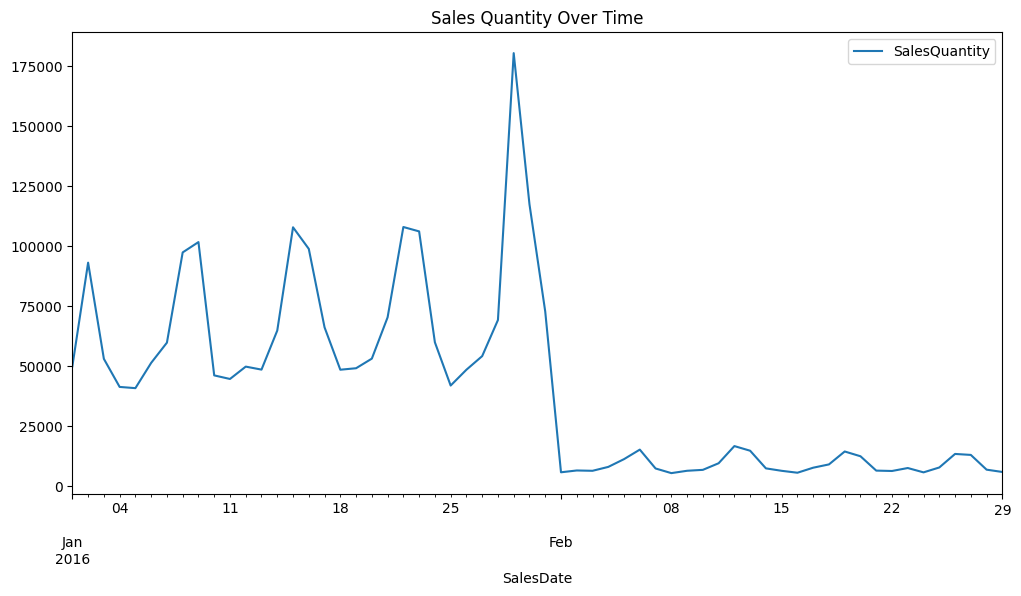

In [128]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

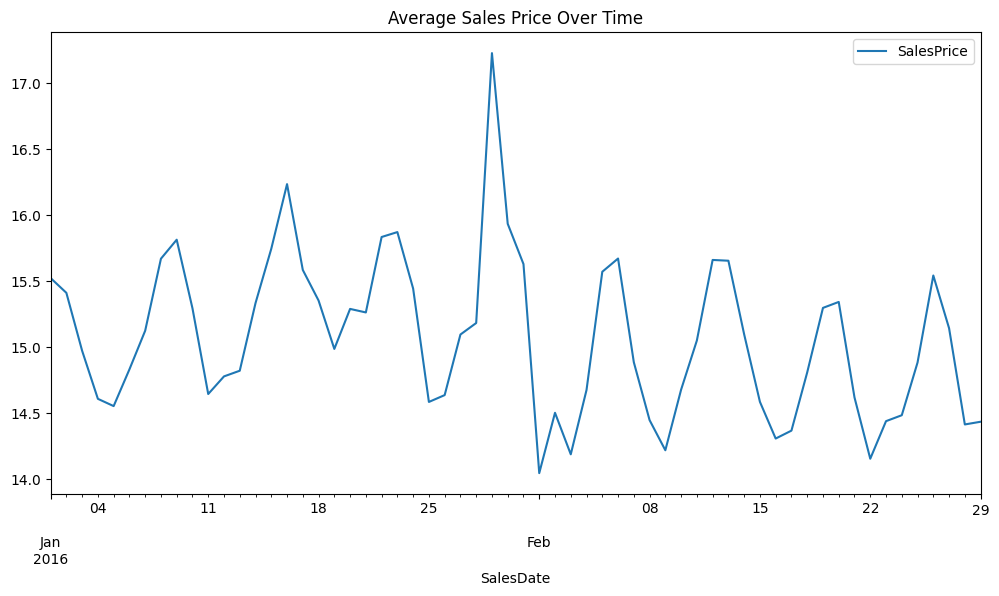

In [129]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

Las cantidades vendidas tienen un carácter cíclico, lo que podría indicar patrones o tendencias semanales.
Alrededor del 25 de enero se observa un pico significativo, que podría atribuirse a eventos específicos, promociones o incluso demandas estacionales. Sin embargo, a medida que nos adentramos en febrero, se produce un notable descenso de las ventas, que luego parecen estabilizarse a medida que avanza el mes.

### 4. Analisis de compra

In [130]:
vendor_purchase_volume = purchase_invoices.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                             Quantity
VendorName                          
DIAGEO NORTH AMERICA INC     5459788
JIM BEAM BRANDS COMPANY      2737165
MARTIGNETTI COMPANIES        2640411
CONSTELLATION BRANDS INC     2325892
E & J GALLO WINERY           1858260
PERNOD RICARD USA            1647558
BACARDI USA INC              1427075
SAZERAC CO INC               1417727
M S WALKER INC               1372841
ULTRA BEVERAGE COMPANY LLP   1077527


In [131]:
vendor_purchase_cost = purchase_prices.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                             PurchasePrice
VendorName                               
MARTIGNETTI COMPANIES            41746.36
ULTRA BEVERAGE COMPANY LLP       33882.72
PERFECTA WINES                   30584.46
SOUTHERN WINE & SPIRITS NE       18877.40
M S WALKER INC                   17710.68
MOET HENNESSY USA INC            17505.36
DIAGEO NORTH AMERICA INC         16162.68
CAMPARI AMERICA                  16026.91
JIM BEAM BRANDS COMPANY          12091.69
EDRINGTON AMERICAS               11453.53


Supply and Payment Durations:.

On average, it takes approximately 7.62 days for the supply process, which indicates a relatively quick turnaround for receiving products after placing an order.
However, the payment duration averages around 35.66 days. This could mean that there might be longer credit terms agreed upon with the vendors or there might be some delay in the payment process.

## Importante para la rotacion de stock -- > 8días